<a href="https://colab.research.google.com/github/VaibhavDwivedi01/Galgotias_University_ML_Lab_Solution/blob/main/ML_EXPERIMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/tmp/ipython-input-324041546.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(age, income, spent, cmap='blue');


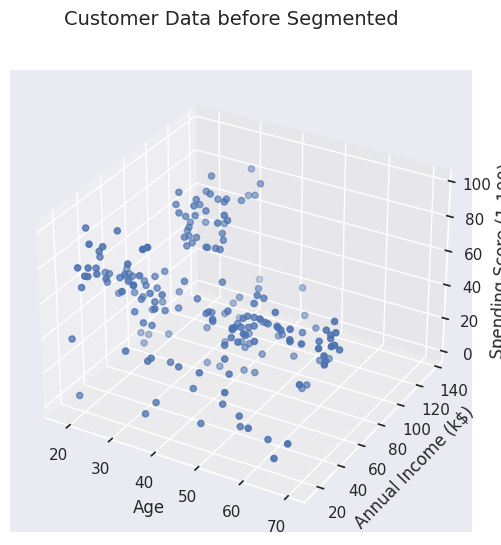

In [ ]:
df.tail()
gender = df['Genre']
age = df['Age']
income = df['Annual Income (k$)']
spent = df['Spending Score (1-100)']
df.describe()
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Customer Data before Segmented', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.scatter(age, income, spent, cmap='blue');

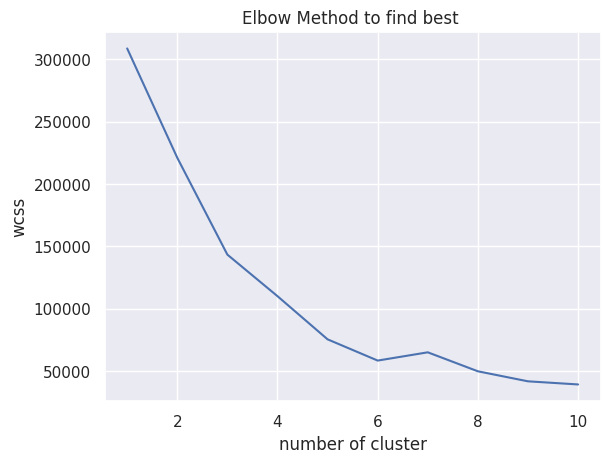

In [ ]:
x=df.drop(['Genre','CustomerID'], axis=1)
from sklearn.cluster import KMeans
iner=[]

wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#print (wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method to find best ')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()


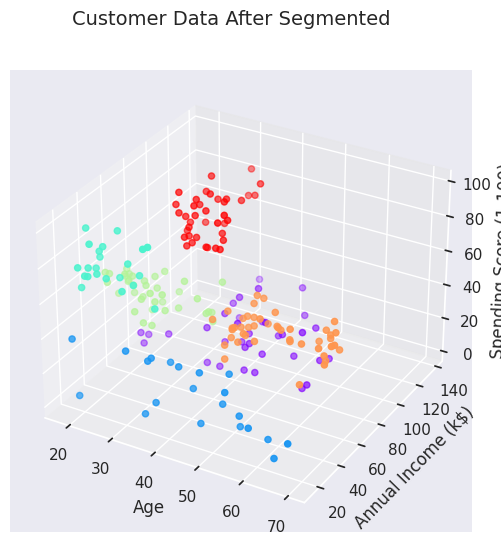

In [ ]:
kmeans = KMeans(6)
kmeans.fit(x)
x['c_pred']=kmeans.fit_predict(x)
x
np.unique(x['c_pred'])

fig = plt.figure(figsize=(8, 6))
fig.suptitle('Customer Data After Segmented', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Data for three-dimensional scattered points
ax.scatter(age, income, spent, c=x['c_pred'], cmap='rainbow');


/tmp/ipython-input-2239986476.py:17: UserWarning: You passed a edgecolor/edgecolors ('gray') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, z, c=color, edgecolors='gray', marker=mark)


Text(0.5, 0, 'Spending Score (1-100)')

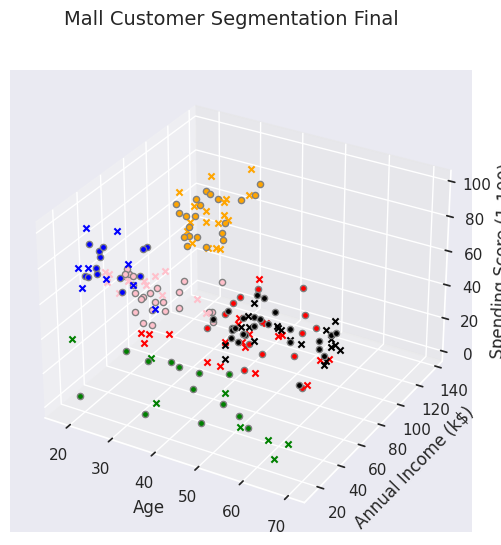

In [ ]:
colors = ['red' if i == 0 else 'green' if i == 1 else 'blue' if i == 2 else 'pink' if i == 3 else 'black' if i == 4 else 'orange' for i in list(x['c_pred'])]
markers = ['x' if q == 'Male' else 'o' for q in list(df['Genre'])]


fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Mall Customer Segmentation Final', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df['Age'])
ys = list(df['Annual Income (k$)'])
zs = list(df['Spending Score (1-100)'])

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

for data, color, mark in zip(data_points, colors, markers):
    x, y, z = data
    ax.scatter(x, y, z, c=color, edgecolors='gray', marker=mark)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
